In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import tensorflow as tf


In [ ]:
zip_path=tf.keras.utils.get_file(fname='jena_climate_2009_2016.csv.zip',
                                 origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
                                 extract=True)
print(zip_path)

#used to split the path name into a pair root and ext
csv_path,_=os.path.splitext(zip_path)
print(csv_path)

13574144/13568290 [==============================] - 0s 0us/step
/root/.keras/datasets/jena_climate_2009_2016.csv.zip
/root/.keras/datasets/jena_climate_2009_2016.csv


In [ ]:
! ls /root/.keras/datasets

jena_climate_2009_2016.csv  jena_climate_2009_2016.csv.zip


In [ ]:
df=pd.read_csv(csv_path)
print(df.shape)
df.head()

(420551, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Univariate data: temp vs time

In [ ]:
uni_data_df=df['T (degC)']
uni_data_df.index=df['Date Time']
uni_data_df.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

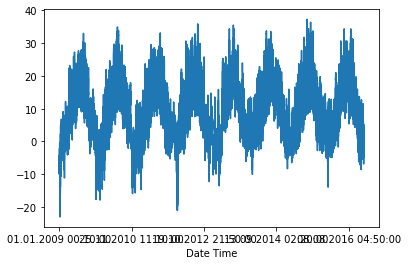

In [ ]:
uni_data_df.plot()

In [ ]:
uni_data=uni_data_df.values

Normalization ->

In [ ]:
Train_split=300000 

tf.random.set_seed(13)

mean=uni_data[:Train_split].mean(axis=0)
std=uni_data[:Train_split].std(axis=0)
uni_data=(uni_data-mean)/std

In [ ]:
def univar_data(dataset,start_index,end_index,hist_size,target_size):
  data=[]
  labels=[]
  start_index=start_index+hist_size
  if end_index is None:
    end_index = len(dataset)-target_size
  for i in range(start_index,end_index):
    indx=range(i-hist_size,i)
    data.append(np.reshape(dataset[indx],(hist_size,1)))
    labels.append(dataset[i+target_size])
  return np.array(data),np.array(labels)

In [ ]:
x_train_uni,y_train_uni=univar_data(uni_data,0,Train_split,20,0)
x_val_uni,y_val_uni=univar_data(uni_data,Train_split,None,20,0)

print(x_train_uni.shape)
print(y_train_uni.shape)
print(x_val_uni.shape)
print(y_val_uni.shape)

(299980, 20, 1)
(299980,)
(120531, 20, 1)
(120531,)


In [ ]:
print(x_train_uni[0])
print(y_train_uni[0])

[[-1.99766294]
 [-2.04281897]
 [-2.05439744]
 [-2.0312405 ]
 [-2.02660912]
 [-2.00113649]
 [-1.95134907]
 [-1.95134907]
 [-1.98492663]
 [-2.04513467]
 [-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]]
-2.1041848598100876


In [ ]:
#utility function
def create_timesteps(len):
  return list(range(-len,0))

create_timesteps(10)  

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

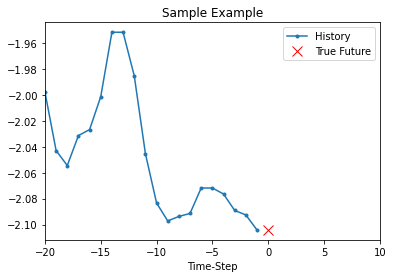

In [ ]:

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go'] 
  time_steps = create_timesteps(plot_data[0].shape[0])
  
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt


show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

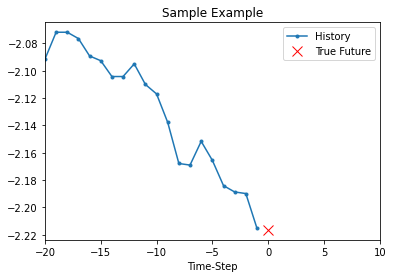

In [ ]:
i=13
show_plot([x_train_uni[i],y_train_uni[i]],0,'Sample Example')

Predict using Moving Window Avearage

In [ ]:
def mwa(hist):
  return np.mean(hist)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

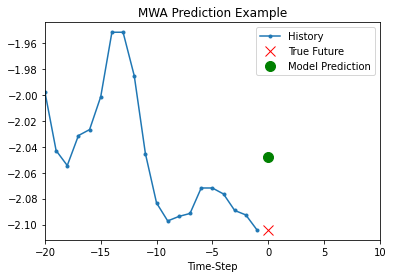

In [ ]:
i=0
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0,
           'MWA Prediction Example')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

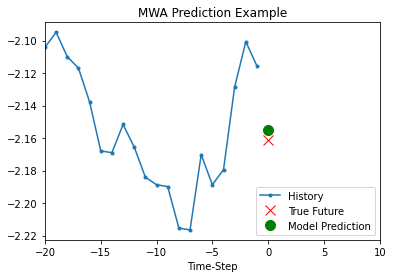

In [ ]:
i=20
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0,
           'MWA Prediction Example')

In [ ]:
x_train_uni.shape

(299980, 20, 1)

In [ ]:
trainx=np.reshape(x_train_uni,(x_train_uni.shape[0],1,x_train_uni.shape[1]))
valx=np.reshape(x_val_uni,(x_val_uni.shape[0],1,x_val_uni.shape[1]))

In [ ]:
print(trainx.shape)
print(valx.shape)

(299980, 1, 20)
(120531, 1, 20)


In [ ]:
trainy=y_train_uni
valy=y_val_uni

In [ ]:
print(trainy.shape)

(299980,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(1,20)))
model.add(Dropout(0.2))
model.add(LSTM(16))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             6784      
_________________________________________________________________
dropout (Dropout)            (None, 1, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 9,937
Trainable params: 9,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist=model.fit(trainx,trainy,epochs=10,batch_size=512,validation_data=(valx,valy))

Epoch 1/10
586/586 [==============================] - 36s 7ms/step - loss: 0.2902 - val_loss: 0.0356
Epoch 2/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0696 - val_loss: 0.0257
Epoch 3/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0636 - val_loss: 0.0234
Epoch 4/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0615 - val_loss: 0.0232
Epoch 5/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0600 - val_loss: 0.0207
Epoch 6/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0582 - val_loss: 0.0238
Epoch 7/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0569 - val_loss: 0.0202
Epoch 8/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0555 - val_loss: 0.0211
Epoch 9/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0544 - val_loss: 0.0207
Epoch 10/10
586/586 [==============================] - 3s 6ms/step - loss: 0.0530 - val_loss: 0.022

## Multi-variate & single-step forecasting

In [ ]:
features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']

features = df[features_considered]
features.index = df['Date Time']
features.head()

,p (mbar),T (degC),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,996.52,-8.02,1307.75
01.01.2009 00:20:00,996.57,-8.41,1309.80
01.01.2009 00:30:00,996.53,-8.51,1310.24
01.01.2009 00:40:00,996.51,-8.31,1309.19
01.01.2009 00:50:00,996.51,-8.27,1309.00


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b33fff9d0>,
      dtype=object)

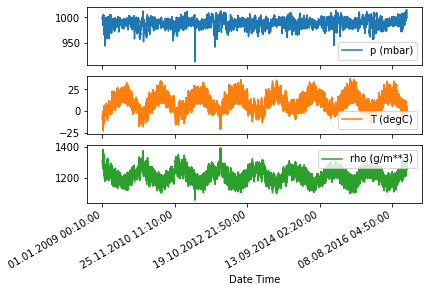

In [ ]:
features.plot(subplots=True)

In [ ]:
# normalization 
dataset = features.values
data_mean = dataset[:Train_split].mean(axis=0)
data_std = dataset[:Train_split].std(axis=0)

dataset = (dataset-data_mean)/data_std

In [ ]:
def multivar_data(dataset,target,start_index,end_index,hist_size,target_size,step,single_step=False):
  data=[]
  labels=[]
  start_index=start_index+hist_size
  if end_index is None:
    end_index = len(dataset)-target_size
  for i in range(start_index,end_index):
    indx=range(i-hist_size,i,step)           # step used here
    data.append(dataset[indx])
    if single_step:                          # single_step used here.
      labels.append(target[i+target_size]) 
    else:
      labels.append(target[i:i+target_size]) 

  return np.array(data),np.array(labels)

In [ ]:
# Generate data
step = 6 # one obs every 6X10min = 60 min => 1 hr

x_train_single, y_train_single = multivar_data(dataset,dataset[:, 1],
                                               0, Train_split,
                                               720,72,step,single_step=True)
x_val_single, y_val_single = multivar_data(dataset, dataset[:, 1],
                                               Train_split, None, 720,
                                               72, step,
                                               single_step=True)

print(x_train_single.shape)
print(y_train_single.shape)

(299280, 120, 3)
(299280,)


In [ ]:
#TF dataset

BUFFER_SIZE=10000
BATCH_SIZE=256

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

print(train_data_single)
print(val_data_single)

<RepeatDataset shapes: ((None, 120, 3), (None,)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 120, 3), (None,)), types: (tf.float64, tf.float64)>


In [ ]:
# Model with tesorflow
EPOCHS=10
STEPS_PER_EPOCH=200

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=STEPS_PER_EPOCH,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 7s 27ms/step - loss: 0.4178 - val_loss: 0.2647
Epoch 2/10
200/200 [==============================] - 5s 25ms/step - loss: 0.2733 - val_loss: 0.2463
Epoch 3/10
200/200 [==============================] - 5s 25ms/step - loss: 0.2678 - val_loss: 0.2461
Epoch 4/10
200/200 [==============================] - 6s 28ms/step - loss: 0.2673 - val_loss: 0.2427
Epoch 5/10
200/200 [==============================] - 5s 25ms/step - loss: 0.2224 - val_loss: 0.2315
Epoch 6/10
200/200 [==============================] - 5s 25ms/step - loss: 0.2456 - val_loss: 0.2556
Epoch 7/10
200/200 [==============================] - 5s 24ms/step - loss: 0.2431 - val_loss: 0.2456
Epoch 8/10
200/200 [==============================] - 5s 24ms/step - loss: 0.2441 - val_loss: 0.2515
Epoch 9/10
200/200 [==============================] - 5s 24ms/step - loss: 0.2464 - val_loss: 0.2396
Epoch 10/10
200/200 [==============================] - 5s 24ms/step - loss: 0.2536 - val_lo

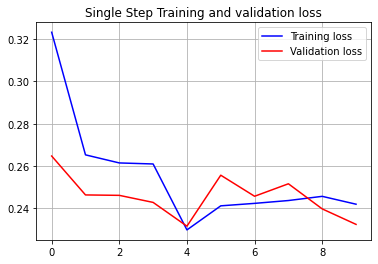

In [ ]:
# Plot train and validation loss over epochs

def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()
  plt.grid()

  plt.show()



plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

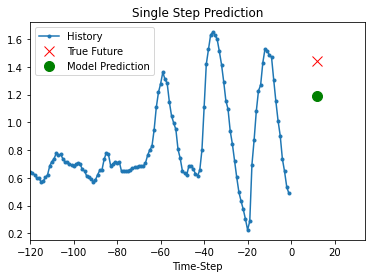

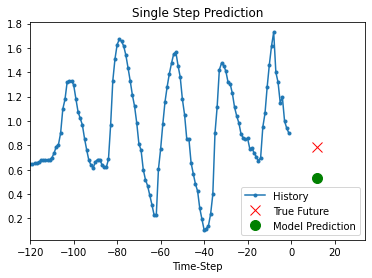

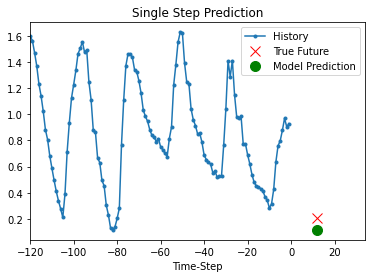

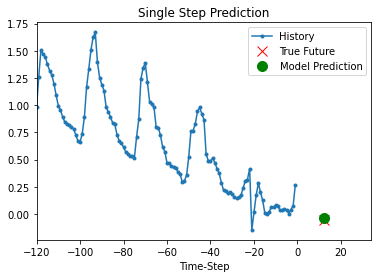

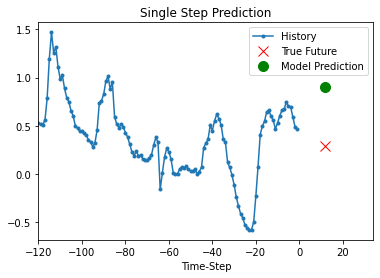

In [ ]:
# plot time series and predicted values

for x, y in val_data_single.take(5):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()


Also we can make multivariate multistep forcasting 

---means we can predict temp for many days in future with history like for next 2 days or something more



---

